### Overview

The `pyemili.recomb` module provides tools for fitting the **electron temperature**, **electron density**, and **ionic abundances** from a selected set of recombination lines. The module requires an input line list containing six columns:

* **`obs_wav`** — observed wavelength (already corrected for radial velocity)
* **`obs_flux`** — observed line flux
* **`obs_fluxerr`** — uncertainty of the observed flux
* **`ele`** — element symbol of the recombination line
* **`ion`** — ionization stage
* **`lab_wav`** *(optional)* — laboratory wavelength of the main component

An example input file is shown below:

In [14]:
import pandas as pd

linelist = pd.read_table('Abell46_erc.dat',sep='\s+',names=['obs_wav','obs_flux','obs_fluxerr','ele','ion'])

In [15]:
linelist

,obs_wav,obs_flux,obs_fluxerr,ele,ion
4085.11,0.0067,0.00168,O,II,4085.112
4089.29,0.0116,0.00174,O,II,4089.290
4097.22,0.0269,0.00215,O,II,4097.220
4104.99,0.0065,0.00163,O,II,4104.990
4107.09,0.0050,0.00150,O,II,4107.092
4119.22,0.0120,0.00180,O,II,4119.217
4132.80,0.0065,0.00163,O,II,4132.800
4153.30,0.0112,0.00180,O,II,4153.298
4275.55,0.0112,0.00168,O,II,4275.551
4276.75,0.0099,0.00168,O,II,4276.750


The observed flux and flux uncertainty should be normalized to **Hβ = 1** (`I_Hbeta = 1`) when ionic abundances are included in the fit. After preparing the input line list, a `Recom_Lines` instance can be created as follows:

In [16]:
from pyemili.recomb import Recom_Lines

ic = Recom_Lines('Abell46_erc.dat')

Now we can use the `fit` function to do the fitting.

In [17]:
result = ic.fit(
        ion='O II',                      # fit the O II recombination lines
        fit_abundance=True,              # If true, flux and flux error should be normalized to Hbeta
        A12=None,                        # prior center of the ionic abundance, the default is the solar value.
        vel=20.0,                        # the velocity window in km/s to collect lab lines per observed feature, this is useful for those unresolved lines in relatively low resolution spectrum
        make_scatter=True,               # save the data-model scatter plot
    )

 43%|████▎     | 12990/30000 [01:08<01:25, 198.02it/s]

[INFO] Convergence detected at iteration 13000


 47%|████▋     | 14000/30000 [01:13<01:23, 191.11it/s]


In [18]:
result

FitResult(flat_samples=array([[2.47284047, 2.83032908, 9.5685079 ],
       [2.43912602, 2.8517301 , 9.54567334],
       [2.4433679 , 2.92778331, 9.56274536],
       ...,
       [2.48566928, 2.98000962, 9.60349321],
       [2.56633738, 3.0226051 , 9.70828119],
       [2.35497425, 4.07213491, 9.50997047]]), medians={'$\\log T_e$': 2.410146938556781, '$\\log N_e$': 3.246594446515628, '$12+\\log(\\mathrm{O}^{2+}/\\mathrm{H^+})$': 9.559276979235534}, intervals={'$\\log T_e$': (2.3409641239645618, 2.545437766504415), '$\\log N_e$': (2.8200074075011172, 4.281142921060583), '$12+\\log(\\mathrm{O}^{2+}/\\mathrm{H^+})$': (9.480648494760247, 9.667681963844322)}, labels=['$\\log T_e$', '$\\log N_e$', '$12+\\log(\\mathrm{O}^{2+}/\\mathrm{H^+})$'], fixed_params={}, figure_paths={'corner': 'Abell46_erc_OII_corner.png', 'scatter': 'Abell46_erc_OII_scatter.png'})

The fitting procedure outputs a `FitResult` object that serves as a container for all MCMC-derived quantities. It includes `flat_samples`, a NumPy array containing the posterior samples after burn-in removal and thinning (with shape *(Nsamples, Ndim)*), as well as `medians`, a dictionary holding the posterior median value of each fitted parameter, and `intervals`, which stores the corresponding 16th–84th percentile confidence ranges. The parameter ordering is defined by `labels`, a list matching each column of `flat_samples`, while `fixed_params` records any parameters that were held fixed during the fit together with their assigned values. The object also provides `figure_paths`, a dictionary containing the file locations of all automatically generated figures, the corner plot and optional data–model comparison plots.

We can print the fitting results directly from the returned `FitResult` object:

In [23]:
for k, v in result.medians.items():
    low, high = result.intervals[k]
    err_minus = v - low
    err_plus = high - v
    print(f"{k}: {v:.3f} (+{err_plus:.3f}/-{err_minus:.3f})")


$\log T_e$: 2.410 (+0.135/-0.069)
$\log N_e$: 3.247 (+1.035/-0.427)
$12+\log(\mathrm{O}^{2+}/\mathrm{H^+})$: 9.559 (+0.108/-0.079)


The paths of the two generated plots:

In [20]:
result.figure_paths

{'corner': 'Abell46_erc_OII_corner.png',
 'scatter': 'Abell46_erc_OII_scatter.png'}

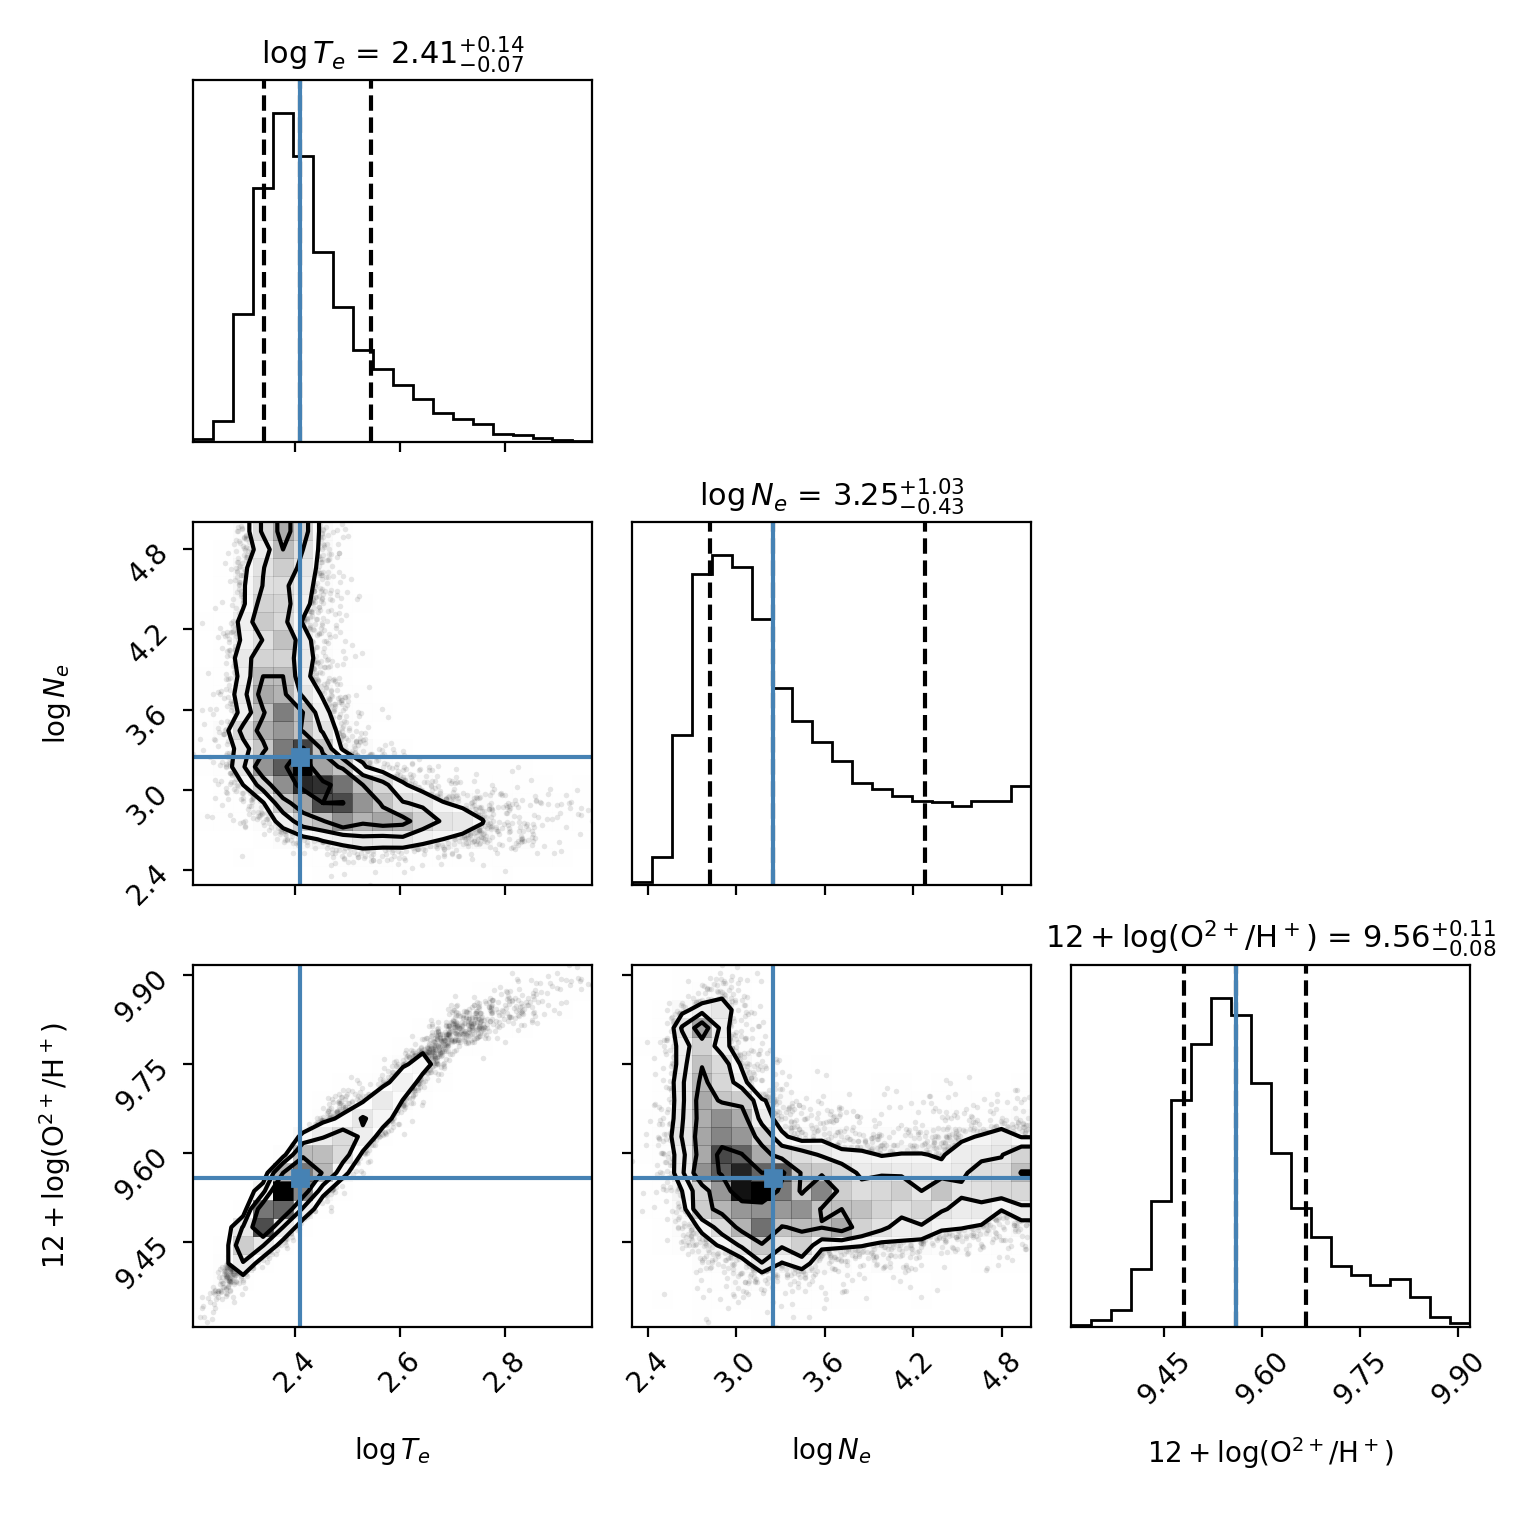

In [21]:
from IPython.display import Image

Image("Abell46_erc_OII_corner.png")

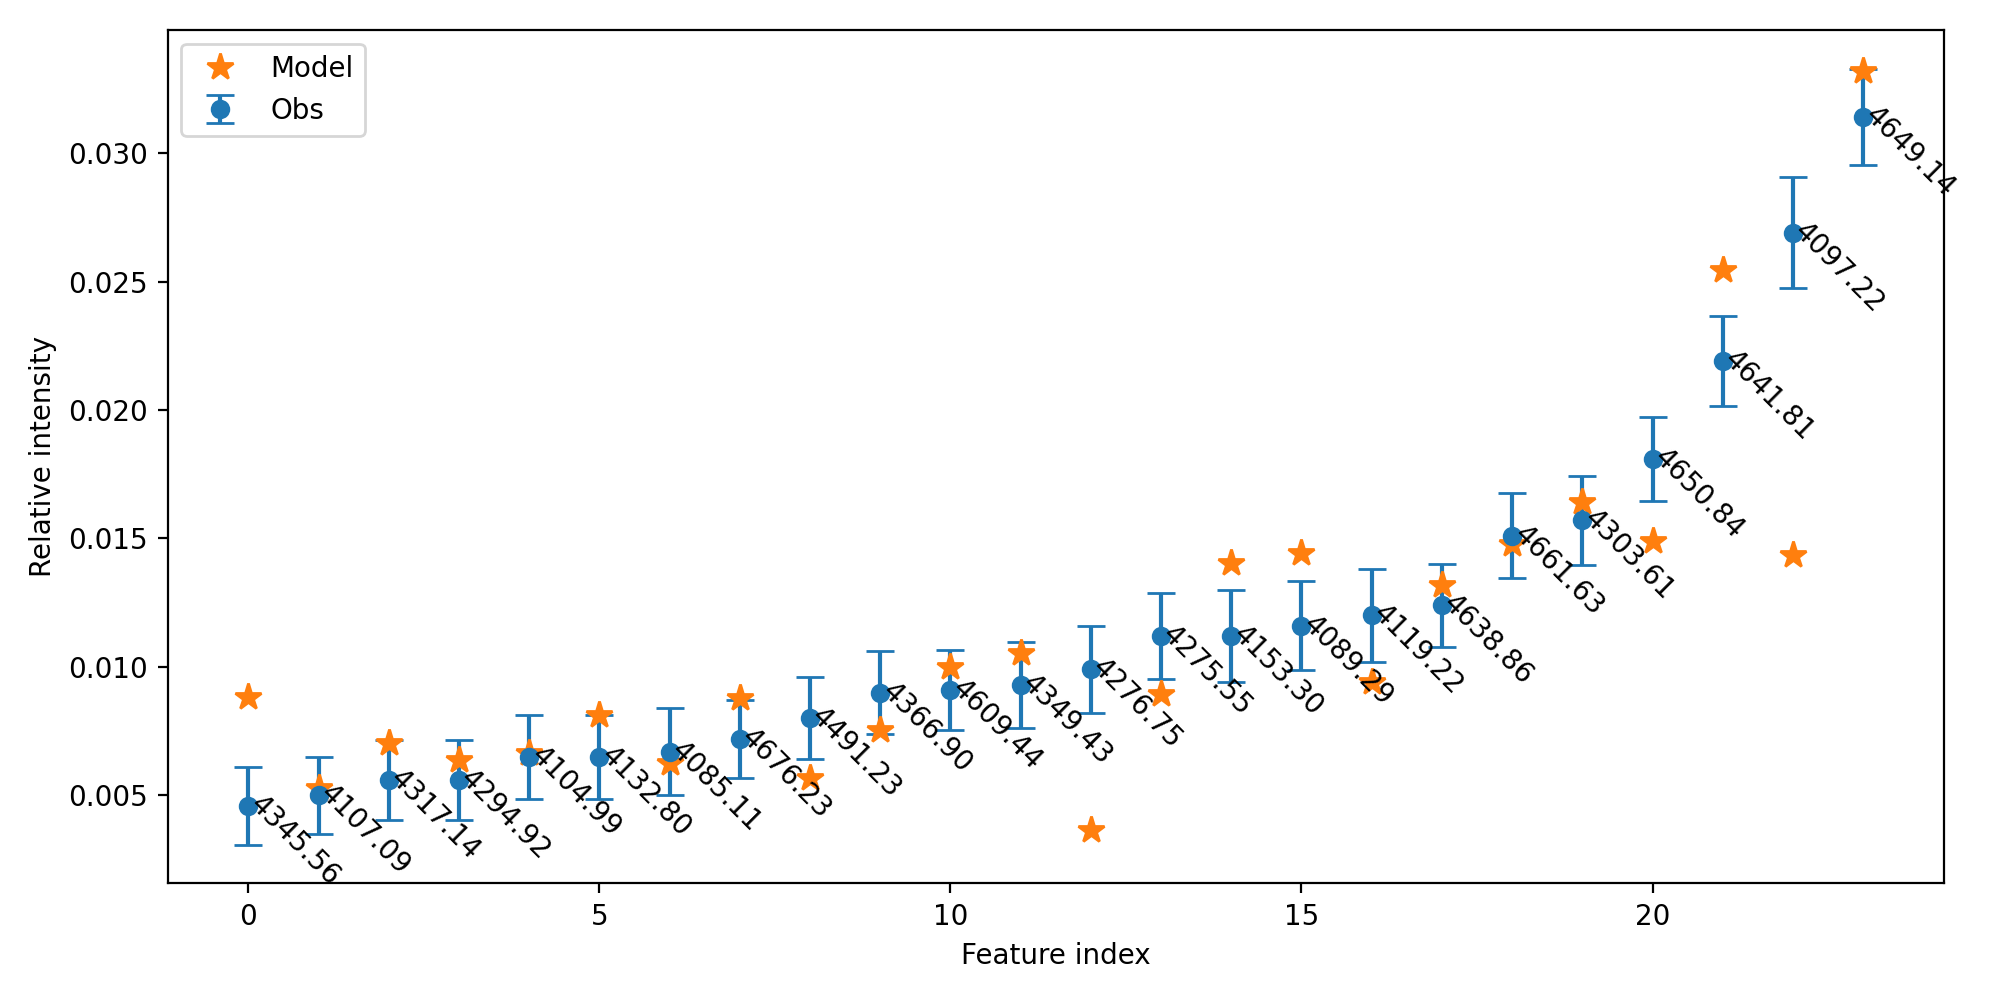

In [22]:
Image("Abell46_erc_OII_scatter.png")